# Webography

- Online Doc: https://pandas.pydata.org/
- CheatSheet : https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- Tutorials:
    - https://www.dataschool.io/easier-data-analysis-with-pandas/
    - https://www.dataschool.io/data-science-best-practices-with-pandas/
- Pandas PySciDataGre Talk : https://python.univ-grenoble-alpes.fr/working-session-librairie-pandas.html
- GeoPandas : http://geopandas.org/

Code using pandas usually starts with the import statement

In [1]:
import numpy as np
import pandas as pd

Pandas 
- 2 data structures (Series, DataFrame) for data analysis
    
- multiple methods for convenient data filtering.

- toolkit utilities to perform input/output operations.
It can read data from a variety of formats such as CSV, TSV, MS Excel, etc.


Pandas has two main data structures for data storage

- Series
- DataFrame


In [2]:
## Series structure
series1 = pd.Series([1, 2, 3, 4])
series1

0    1
1    2
2    3
3    4
dtype: int64

In [3]:
print(series1.sum())
print(series1.mean())

10
2.5


In [4]:
print(series1.to_csv())

,0
0,1
1,2
2,3
3,4



In [5]:
fruits = np.array(["kiwi", "orange", "mango", "apple"])
series2 = pd.Series(fruits)
series2

0      kiwi
1    orange
2     mango
3     apple
dtype: object

# Dataframe

A dictionnary of series where keys are column name

<div><img style="float: left;margin-left : 70px" src='fig/dataframe_type.png' height="800" width="800"/>


## How to create a data frame ?


### From scratch


In [6]:
# Intialise data: dictionnary of lists.
data = {
    "Name": ["John", "Paul", "Debby", "Laura"],
    "Sex": ["Male", "Male", "Female", "Female"],
    "Age": [20, 40, 19, 30],
}

# Create DataFrame
df = pd.DataFrame(data)
df

Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30

In [7]:
type(df.Age)

pandas.core.series.Series

### From a file

In [8]:
df_person = pd.read_csv("files/person.txt", sep=",", encoding="utf-8", header=0)
df_person

Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30

By default, a new index is created

If you want use a field-based index, you have to specify it in the `read_csv` function:

```python
df_person = pd.read_csv('files/person.txt', sep = ',', index_col='Name', encoding="utf-8", header=0)
```


## Basic commands

In [9]:
# display simple statistics
df_person.describe()

Age
count   4.000000
mean   27.250000
std     9.844626
min    19.000000
25%    19.750000
50%    25.000000
75%    32.500000
max    40.000000

In [10]:
# display the 5 first rows
df_person.head()

Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30

In [11]:
# display the 5 last rows
df_person.tail()

Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30

In [12]:
# display the dataframe columns
df_person.columns

Index(['Name', 'Sex', 'Age'], dtype='object')

In [13]:
# query one column
df_person["Age"]

0    20
1    40
2    19
3    30
Name: Age, dtype: int64

In [14]:
# another method to query one column
df_person.Age

0    20
1    40
2    19
3    30
Name: Age, dtype: int64

In [15]:
# query multiple columns
df_person[["Name", "Age"]]

Name  Age
0   John   20
1   Paul   40
2  Debby   19
3  Laura   30

In [16]:
# display unique value of a column
df_person.Sex.unique()

array(['Male', 'Female'], dtype=object)

In [17]:
# display 2 first rows
df_person[:2]

Name   Sex  Age
0  John  Male   20
1  Paul  Male   40

### iloc: Purely integer-location based indexing for selection by position.

In [18]:
df_person.head()

Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30

In [19]:
df_person.iloc[2]

Name     Debby
Sex     Female
Age         19
Name: 2, dtype: object

In [20]:
df_person.iloc[2, 2]

19

### `loc`: access a group of rows and columns by label(s) or a boolean array.

In [21]:
df_person.head()

Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30

In [22]:
# one line
df_person.loc[2]

Name     Debby
Sex     Female
Age         19
Name: 2, dtype: object

In [23]:
# one value
df_person.loc[2, "Name"]

'Debby'

In [24]:
# Basic operations on columns
df_person.Age = df_person.Age + 2
df_person.Age

0    22
1    42
2    21
3    32
Name: Age, dtype: int64

Get or set a single value (fast)

- `df_person.at`: by labels

- `df_person.iat`: "integer-location based indexing"

In [25]:
df_person.head()

Name     Sex  Age
0   John    Male   22
1   Paul    Male   42
2  Debby  Female   21
3  Laura  Female   32

In [26]:
df_person.at[2, "Name"]

'Debby'

In [27]:
df_person.iat[2, 0]

'Debby'

### Add a row

In [28]:
df_person = df_person.append(
    {"Name": "Glenn", "Sex": "Male", "Age": 10}, ignore_index=True
)
df_person

Name     Sex  Age
0   John    Male   22
1   Paul    Male   42
2  Debby  Female   21
3  Laura  Female   32
4  Glenn    Male   10

### Add some rows

In [29]:
data = {
    "Name": ["Marguerite", "Annie", "Stephen", "Ava"],
    "Sex": ["Female", "Female", "Male", "Female"],
    "Age": [34, 23, 49, 22],
}

df_person = df_person.append(pd.DataFrame(data), ignore_index=True)
df_person

Name     Sex  Age
0        John    Male   22
1        Paul    Male   42
2       Debby  Female   21
3       Laura  Female   32
4       Glenn    Male   10
5  Marguerite  Female   34
6       Annie  Female   23
7     Stephen    Male   49
8         Ava  Female   22

### Add a column

In [30]:
df_person["Nationality"] = "USA"
df_person

Name     Sex  Age Nationality
0        John    Male   22         USA
1        Paul    Male   42         USA
2       Debby  Female   21         USA
3       Laura  Female   32         USA
4       Glenn    Male   10         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
7     Stephen    Male   49         USA
8         Ava  Female   22         USA

## Basic statistics

In [31]:
type(df_person.Age)

pandas.core.series.Series

In [32]:
print(df_person.Age.mean())
print(df_person.Age.min())
print(df_person.Age.max())
print(df_person.Age.count())

28.333333333333332
10
49
9


## How to sort data ?

In [33]:
df_person_sorted = df_person.sort_values(["Age"], ascending=True)
df_person_sorted

Name     Sex  Age Nationality
4       Glenn    Male   10         USA
2       Debby  Female   21         USA
0        John    Male   22         USA
8         Ava  Female   22         USA
6       Annie  Female   23         USA
3       Laura  Female   32         USA
5  Marguerite  Female   34         USA
1        Paul    Male   42         USA
7     Stephen    Male   49         USA

## Selection

In [34]:
# selection with one criterion
df_person[df_person["Sex"] == "Female"]

Name     Sex  Age Nationality
2       Debby  Female   21         USA
3       Laura  Female   32         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
8         Ava  Female   22         USA

In [35]:
df_person[df_person["Age"] < 20]

Name   Sex  Age Nationality
4  Glenn  Male   10         USA

In [36]:
# selection with 2 criteria
df_person[(df_person["Sex"] == "Male") & (df_person["Age"] > 30)]

Name   Sex  Age Nationality
1     Paul  Male   42         USA
7  Stephen  Male   49         USA

## Update data

In [37]:
# change one value by index
df_person.loc[7, "Name"] = "Stephane"
df_person

Name     Sex  Age Nationality
0        John    Male   22         USA
1        Paul    Male   42         USA
2       Debby  Female   21         USA
3       Laura  Female   32         USA
4       Glenn    Male   10         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
7    Stephane    Male   49         USA
8         Ava  Female   22         USA

In [38]:
# change one value after a selection
df_person.loc[df_person["Name"] == "Stephane", "Name"] = "Eric"
df_person

Name     Sex  Age Nationality
0        John    Male   22         USA
1        Paul    Male   42         USA
2       Debby  Female   21         USA
3       Laura  Female   32         USA
4       Glenn    Male   10         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
7        Eric    Male   49         USA
8         Ava  Female   22         USA

In [39]:
## Add a column
df_person["City"] = "City"
df_person

Name     Sex  Age Nationality  City
0        John    Male   22         USA  City
1        Paul    Male   42         USA  City
2       Debby  Female   21         USA  City
3       Laura  Female   32         USA  City
4       Glenn    Male   10         USA  City
5  Marguerite  Female   34         USA  City
6       Annie  Female   23         USA  City
7        Eric    Male   49         USA  City
8         Ava  Female   22         USA  City

In [40]:
## Delete a column
df_person = df_person.drop("City", axis=1)
df_person

Name     Sex  Age Nationality
0        John    Male   22         USA
1        Paul    Male   42         USA
2       Debby  Female   21         USA
3       Laura  Female   32         USA
4       Glenn    Male   10         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
7        Eric    Male   49         USA
8         Ava  Female   22         USA

## Concat

<div><img style="float: left;margin-left : 70px" src='fig/concat-example.png' height="600" width="600"/>

In [41]:
data = {
    "Name": ["Benedicte", "Bernard", "Nicolas", "Anne"],
    "Sex": ["Female", "Male", "Male", "Female"],
    "Age": [24, 34, 49, 42],
    "Nationality": ["FR", "FR", "FR", "FR"],
}
df_person_fr = pd.DataFrame(data)
list_person = [df_person, df_person_fr]
result = pd.concat(list_person)
result

Name     Sex  Age Nationality
0        John    Male   22         USA
1        Paul    Male   42         USA
2       Debby  Female   21         USA
3       Laura  Female   32         USA
4       Glenn    Male   10         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
7        Eric    Male   49         USA
8         Ava  Female   22         USA
0   Benedicte  Female   24          FR
1     Bernard    Male   34          FR
2     Nicolas    Male   49          FR
3        Anne  Female   42          FR

## Join

<div><img style="float: left;margin-left : 70px" src='fig/join-example.png' height="600" width="600"/>

In [42]:
import random

data = {
    "id_Address": [0, 1, 2, 3],
    "Address": ["gordon street", "aqua boulevard", "st georges street", "5th street"],
    "City": ["Boston", "Chicago", "Charlotte", "San Francisco"],
}

# Create DataFrame
df_address = pd.DataFrame(data)
df_address

id_Address            Address           City
0           0      gordon street         Boston
1           1     aqua boulevard        Chicago
2           2  st georges street      Charlotte
3           3         5th street  San Francisco

In [43]:
df_person["id_Address"] = ""
nb_elements = df_person.Name.count()

cpt = 0
while cpt < nb_elements:
    df_person.loc[cpt, "id_Address"] = random.randint(0, 3)
    cpt = cpt + 1
df_person

Name     Sex  Age Nationality id_Address
0        John    Male   22         USA          3
1        Paul    Male   42         USA          1
2       Debby  Female   21         USA          1
3       Laura  Female   32         USA          2
4       Glenn    Male   10         USA          0
5  Marguerite  Female   34         USA          3
6       Annie  Female   23         USA          2
7        Eric    Male   49         USA          2
8         Ava  Female   22         USA          2

In [44]:
result = pd.merge(df_person, df_address, how="left", on="id_Address")
result

Name     Sex  Age Nationality id_Address            Address  \
0        John    Male   22         USA          3         5th street   
1        Paul    Male   42         USA          1     aqua boulevard   
2       Debby  Female   21         USA          1     aqua boulevard   
3       Laura  Female   32         USA          2  st georges street   
4       Glenn    Male   10         USA          0      gordon street   
5  Marguerite  Female   34         USA          3         5th street   
6       Annie  Female   23         USA          2  st georges street   
7        Eric    Male   49         USA          2  st georges street   
8         Ava  Female   22         USA          2  st georges street   

            City  
0  San Francisco  
1        Chicago  
2        Chicago  
3      Charlotte  
4         Boston  
5  San Francisco  
6      Charlotte  
7      Charlotte  
8      Charlotte

## Group By

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

<div><img style="float: left;margin-left : 70px" src='fig/groupby-example.png' height="800" width="800"/>

In [45]:
df_person.groupby("Sex")["Sex"].count()

Sex
Female    5
Male      4
Name: Sex, dtype: int64

In [46]:
df_person.groupby("Sex")["Age"].mean()

Sex
Female    26.40
Male      30.75
Name: Age, dtype: float64

## Export data 

In [47]:
export_csv = df_person.to_csv(r"./files/export_person.csv", index=None, header=True)

## Plot data

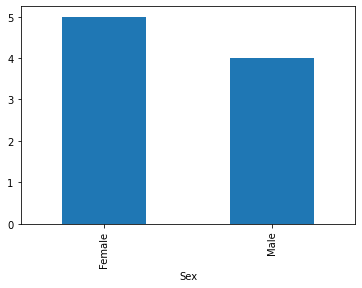

In [48]:
%matplotlib inline
df_person.groupby("Sex")["Sex"].count().plot.bar();

# DIY

## Goals : Compute light statistics on IMDB Movies files


The goal of this session is to end up with a script that computes some simple statistics from IMDB Movies files. The file was modified and reduced for this exercice 


Material

Data are in 2 files Directory named "files"

- name.tsv

This file contains the actors, the separation character is tabulation '\t'. The first line is the header.
```
nconst	primaryName	birthYear	deathYear	primaryProfession	knownForTitles
```

- title.tsv

This file contains the movies, the separation character is ','. The first line is the header.
```
tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
```

We want to
- load data from tsv file
- compute some basic statistics
- save data to tsv file

## Compute some basic statistics

1. Count the number of movies
2. Display the latest movies
3. Display the movies between 1939 and 1940
4. Diplay all the available titleType
5. Count the number of movies by titleType
6. Display Humphrey Bogart movies
7. Plot movie count by year between 1950 and 1960



## A possible correction

1. Count the number of movies

In [49]:
# load data
df_title = pd.read_csv(
    "files/diy_12_pandas/title.tsv", sep=",", encoding="utf-8", header=0
)
df_title.index

RangeIndex(start=0, stop=135460, step=1)

In [50]:
df_title.head()

tconst titleType                                   primaryTitle  \
0  tt0000009     movie                                     Miss Jerry   
1  tt0000020     short                                 The Derby 1895   
2  tt0000024     short                      Opening of the Kiel Canal   
3  tt0000025     short  The Oxford and Cambridge University Boat Race   
4  tt0000165     short                                Riña en un café   

                                   originalTitle  isAdult  startYear  endYear  \
0                                     Miss Jerry        0     1894.0      NaN   
1                                 The Derby 1895        0     1895.0      NaN   
2                      Opening of the Kiel Canal        0     1895.0      NaN   
3  The Oxford and Cambridge University Boat Race        0     1895.0      NaN   
4                                Riña en un café        0     1897.0      NaN   

   runtimeMinutes                   genres  
0            45.0                  Romance  
1             1.0  Documentary,Short,Sport  
2             NaN               News,Short  
3             NaN         News,Short,Sport  
4             1.0                    Short

In [51]:
df_title.primaryTitle.count()

135460

2. Display the latest movies

In [52]:
df_title.sort_values(["startYear"], ascending=False).head()

tconst titleType           primaryTitle          originalTitle  \
123383  tt3554046     movie            Space Jam 2            Space Jam 2   
112158  tt1630029     movie               Avatar 2               Avatar 2   
132762  tt7304824     movie  Ofrenda a la tormenta  Ofrenda a la tormenta   
134753  tt8984382     movie               Jagdzeit               Jagdzeit   
131619  tt6615224     movie               HeadShop               HeadShop   

        isAdult  startYear  endYear  runtimeMinutes  \
123383        0     2021.0      NaN             NaN   
112158        0     2021.0      NaN             NaN   
132762        0     2020.0      NaN             NaN   
134753        0     2020.0      NaN             NaN   
131619        0     2020.0      NaN             NaN   

                            genres  
123383  Action,Adventure,Animation  
112158    Action,Adventure,Fantasy  
132762              Crime,Thriller  
134753                       Drama  
131619                      Comedy

3. Display the movies between 1939 and 1940

In [53]:
df_title[(df_title.startYear >= 1939) & (df_title.startYear <= 1940)]["originalTitle"]

3530                    Así es la vida
5342                          Alhambra
5438                 Dernière jeunesse
5484                   El genio alegre
5577                     María de la O
                      ...             
131626                       Hirurgiya
131807               Hurricane Special
131951             Då länkarna smiddes
133077              En correctionnelle
134454    Hollywood Funtime, Program 2
Name: originalTitle, Length: 1004, dtype: object

4. Diplay all the available titleType

In [54]:
df_title["titleType"].unique()

array(['movie', 'short', 'tvMovie', 'tvSeries', 'tvMiniSeries', 'tvShort',
       'tvSpecial', 'tvEpisode', 'video', 'videoGame'], dtype=object)

5. Count the number of movies by titleType

In [55]:
df_title.groupby("titleType")["titleType"].count()

titleType
movie           86687
short           12624
tvEpisode          13
tvMiniSeries     2651
tvMovie          9199
tvSeries        17863
tvShort           410
tvSpecial         695
video            4465
videoGame         853
Name: titleType, dtype: int64

6. Display Humphrey Bogart movies

In [56]:
df_name = pd.read_csv(
    "files/diy_12_pandas/name.tsv", sep="\t", encoding="utf-8", header=0
)
author_titles = df_name.loc[df_name["primaryName"] == "Humphrey Bogart"][
    "knownForTitles"
]
df_title.loc[df_title["tconst"].isin(author_titles.tolist()[0].split(","))]

tconst titleType          primaryTitle         originalTitle  \
7458   tt0033870     movie    The Maltese Falcon    The Maltese Falcon   
7678   tt0034583     movie            Casablanca            Casablanca   
8620   tt0037382     movie  To Have and Have Not  To Have and Have Not   
10879  tt0043265     movie     The African Queen     The African Queen   

       isAdult  startYear  endYear  runtimeMinutes                    genres  
7458         0     1941.0      NaN           100.0         Film-Noir,Mystery  
7678         0     1942.0      NaN           102.0         Drama,Romance,War  
8620         0     1944.0      NaN           100.0  Adventure,Comedy,Romance  
10879        0     1951.0      NaN           105.0   Adventure,Drama,Romance

In [57]:
df = (
    df_title[(df_title["startYear"] >= 1950) & (df_title["startYear"] <= 1960)]
    .groupby("startYear")["startYear"]
    .count()
)
df

startYear
1950.0    633
1951.0    644
1952.0    709
1953.0    713
1954.0    692
1955.0    765
1956.0    800
1957.0    831
1958.0    825
1959.0    866
1960.0    879
Name: startYear, dtype: int64

7. Plot movie count by year between 1950 and 1960

<AxesSubplot:xlabel='startYear'>

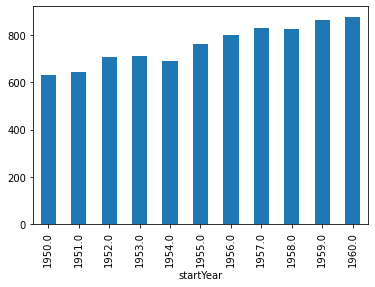

In [58]:
df.plot.bar()